<a href="https://colab.research.google.com/github/viscoss/system_quality_project/blob/PJY/notebooks/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [18]:
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
train_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/train_err_data.csv')
train_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/train_quality_data.csv')
train_prob = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/train_problem_data.csv')

In [20]:
test_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/test_err_data.csv')
test_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/test_quality_data.csv')

In [ ]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


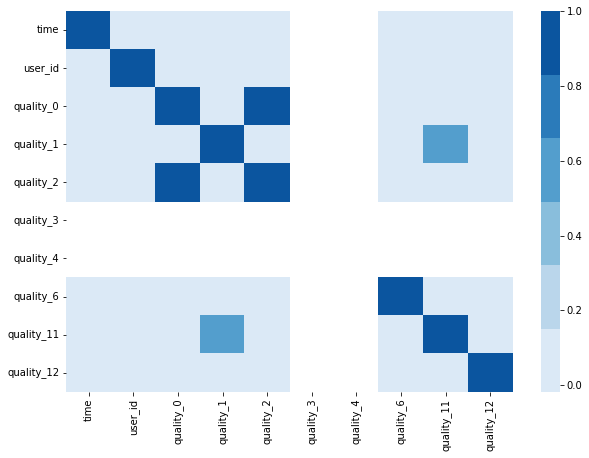

In [19]:
corr = train_qual.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

Text(0.5, 1.0, 'type Values in the Training Set - train ()')

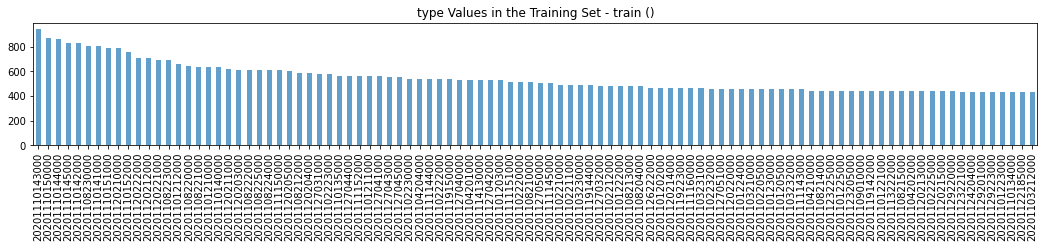

In [ ]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train_qual['time'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train ()')

In [ ]:
print(train_err.columns)

Index(['user_id', 'time', 'model_nm', 'fwver', 'errtype', 'errcode'], dtype='object')


In [ ]:
print(train_qual.columns)

Index(['time', 'user_id', 'fwver', 'quality_0', 'quality_1', 'quality_2',
       'quality_3', 'quality_4', 'quality_5', 'quality_6', 'quality_7',
       'quality_8', 'quality_9', 'quality_10', 'quality_11', 'quality_12'],
      dtype='object')


In [ ]:
print(train_prob.columns)

Index(['user_id', 'time'], dtype='object')


In [ ]:
train_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


In [ ]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [ ]:
train_err.isnull().sum()
#errcode 결측치1. 제거? 변환? 중간값? 

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

In [ ]:
train_qual.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [ ]:
train_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


In [ ]:
train_prob.isnull().sum()

user_id    0
time       0
dtype: int64

In [ ]:
train_err['errcode'].value_counts()

1                     8906967
0                     2599123
connection timeout    1835600
B-A8002                897863
80                     334018
                       ...   
4329                        1
3765                        1
4105                        1
5779                        1
25999                       1
Name: errcode, Length: 2805, dtype: int64

In [ ]:
train_qual['fwver'].value_counts()

05.15.2138    163236
04.22.1750    142032
04.33.1261    131340
04.16.3553    111996
03.11.1167    104148
04.33.1185     66024
04.22.1778     56472
04.22.1684      3420
09.17.1431      3384
04.16.3571      2232
04.82.1684      1044
04.33.1149       804
04.22.1666       636
05.66.3237       552
04.82.1778       216
03.11.1149       204
04.73.2237       192
04.33.1125       144
05.66.3571        96
05.15.2114        96
05.15.2120        84
04.22.1442        84
05.15.2122        60
04.22.1656        12
04.16.3439        12
04.73.2571        12
04.16.3345        12
Name: fwver, dtype: int64

In [ ]:
train_qual.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [ ]:
train_prob.isnull().sum() 
#결측치 0 

user_id    0
time       0
dtype: int64

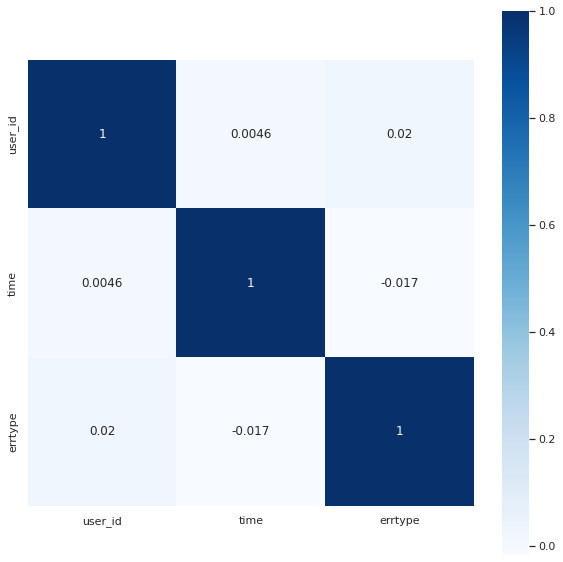

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
plt.figure(figsize=(10,10))
sns.heatmap(data=train_err.corr(),square=True,cmap="Blues",annot=True)

In [ ]:
train_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


In [ ]:
train_prob.head(50)

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
5,16852,20201119150000
6,23427,20201121110000
7,13507,20201111160000
8,11274,20201118120000
9,20610,20201127230000


In [ ]:
train_prob.duplicated(user_id=list/none, keep='first'/'last'/False)

NameError: ignored

In [ ]:
test_err

,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2
2,30000,20201101030228,model_1,04.16.3553,15,1
3,30000,20201101030256,model_1,04.16.3553,22,1
4,30000,20201101030300,model_1,04.16.3553,11,1
...,...,...,...,...,...,...
16532643,44998,20201130210050,model_1,04.16.3553,40,0
16532644,44998,20201130211831,model_1,04.16.3553,31,1
16532645,44998,20201130211832,model_1,04.16.3553,15,1
16532646,44998,20201130212259,model_1,04.16.3553,16,1


In [ ]:
print(train_qual.columns)

Index(['time', 'user_id', 'fwver', 'quality_0', 'quality_1', 'quality_2',
       'quality_3', 'quality_4', 'quality_5', 'quality_6', 'quality_7',
       'quality_8', 'quality_9', 'quality_10', 'quality_11', 'quality_12'],
      dtype='object')


In [ ]:
print(train_prob.columns)

Index(['user_id', 'time'], dtype='object')


In [ ]:
print(train_err.columns)

Index(['user_id', 'time', 'model_nm', 'fwver', 'errtype', 'errcode'], dtype='object')


In [ ]:
ㅔ